In [1]:
import os
import re
import cv2
import random
import numpy as np
import pandas as pd
from time import time
import seaborn as sns
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.covariance import MinCovDet
from scipy.spatial.distance import mahalanobis
from sklearn.preprocessing import LabelEncoder
from scipy.spatial.distance import mahalanobis
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA, IncrementalPCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.metrics import accuracy_score, silhouette_score, classification_report

In [2]:
import warnings
warnings.filterwarnings('ignore')


In [3]:

class MahalanobisClassifier:
    def __init__(self):
        self.class_means = None
        self.inv_cov_matrix = None
    
    def fit(self, X_train, y_train):
        self.class_labels = np.unique(y_train)
        self.class_means = {}
        epsilon = 1e-6
        cov_matrix = np.cov(X_train, rowvar=False) + epsilon * np.eye(X_train.shape[1])
        self.inv_cov_matrix = np.linalg.inv(cov_matrix)
        for label in self.class_labels:
            self.class_means[label] = np.mean(X_train[y_train == label], axis=0)
    
    def predict(self, X_test):
        predictions = []
        for x in X_test:
            min_distance = float('inf')
            best_class = None
            for label, mean in self.class_means.items():
                distance = mahalanobis(x, mean, self.inv_cov_matrix)
                if distance < min_distance:
                    min_distance = distance
                    best_class = label

            # Ensure best_class is assigned, if not, assign a default value or raise a warning
            if best_class is None:
                raise ValueError("No class label could be assigned. Check the input data or covariance matrix.")

            predictions.append(best_class)
        return np.array(predictions)

In [4]:
def mean_image(images, mean_all = True):
    if mean_all:
        mean_image = np.mean(images, axis=0)
        centered_images = images - mean_image
    else:
        old_class = -1
        temp_ = []
        centered_images = []
        for _,i in enumerate(images):
            if _ == 0:
                old_class = labels[0][:2]
            match = labels[_]
            if old_class == match:
                temp_.append(images[_])
            else:
                old_class = match
                mean_image = np.mean(temp_, axis=0)
                [centered_images.append(images[i]- mean_image) for i in range(_-10,_)]
                temp_ = []
            if _ == len(images)-1:
                mean_image = np.mean(temp_, axis=0)
                [centered_images.append(images[i]- mean_image) for i in range(_-10,_)]
                
    return centered_images


In [5]:
# Step 1: Read Dataset
images = []
labels = []

for i in range(1,41):
    for j in range(1,11):
        path = f'./Data//MachineVision//FacesDatabase//s{i}'
        path = path+f'//{j}.pgm'
        n = f"s{i}"
        labels.append(n)
        
        image = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
        images.append(image)


Number images in the dataset: 400
Image Size: [ 92 112]
Number of Image Channels: 1
Number of Classes: 40
Average number Images per class: 0.0

Plotting 5 random images from image dataset:


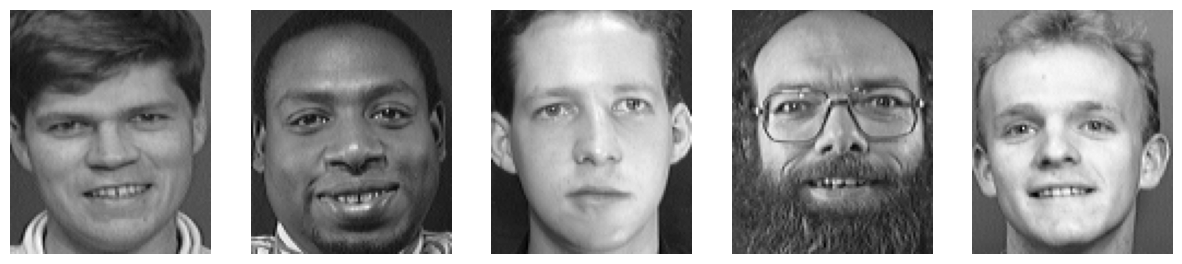

In [6]:
# Step 2: Explore Dataset

print(f'Number images in the dataset: {len(images)}')
print(f'Image Size: {np.unique([images[i].shape for i in range(len(images))])}')
if images[0].ndim == 2:
    num_channel = 1 
else:
    num_channel = image[0].shape[-1]
    
print(f'Number of Image Channels: {num_channel}')

print(f'Number of Classes: {len(np.unique(labels))}')
print(f'Average number Images per class: {np.mean([np.sum(labels == label) for label in np.unique(labels)])}')

print()

print('Plotting 5 random images from image dataset:')
random_integers = [random.randint(0, 400) for _ in range(5)]
imgs_ = [images [i] for i in random_integers]
#     plt.imshow(images[i],cmap='gray')
#     plt.show()
# Create a figure to hold the images
fig, axes = plt.subplots(1, 5, figsize=(15, 5))

# Display the images side by side
for i, ax in enumerate(axes):
    ax.imshow(imgs_[i], cmap='gray')
    ax.axis('off')  # Hide the axis

# Display the plot
plt.show()
    


In [8]:
# Step 3 - Data Preprocessing 

#1) Calculate Mean and substract from data to center the data

#a) Calculate mean within each class
centered_imgs_class = mean_image(images, False)

#b) Calculate mean for the entire dataset
centered_imgs_all = mean_image(images, True)

scaled_imgs = centered_imgs_all
#scaled_imgs = scaled_imgs / np.std(scaled_imgs, axis=0)
scaled_imgs = np.array(scaled_imgs)
labels = np.array(labels) 

X = np.array([img.flatten() for img in scaled_imgs])
y = labels
le = LabelEncoder()
y= le.fit_transform(labels)



In [35]:
# Step 4 - Split dataset into Training and Testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

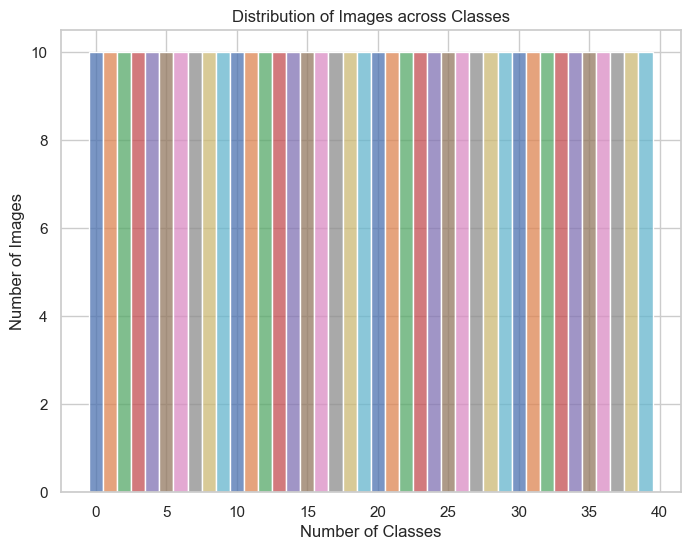

In [9]:
df = pd.DataFrame({'Y': y})

sns.set(style="whitegrid")

plt.figure(figsize=(8, 6))
for i in range(40):
    sns.histplot(df[df['Y'] == i]['Y'], kde=False, bins=40,  label=f'Class {i}', discrete=True)

plt.title('Distribution of Images across Classes')
plt.xlabel('Number of Classes')
plt.ylabel('Number of Images')
plt.show()

In [36]:
# Step 4 - Split dataset into Training and Testing
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
classifier_acc = []
error_rate = []
time_ = []

In [ ]:
# Control (Without Dimentionality Reduction) Classification Accuracy 

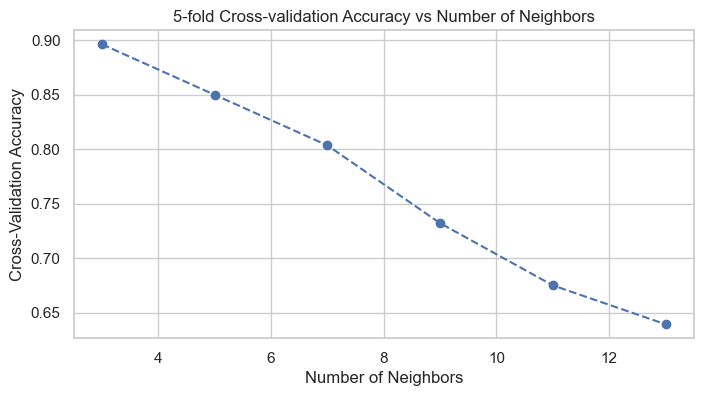

In [11]:
k_values = [3,5,7,9,11,13]
cv_scores = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')  # 10-fold cross-validation
    cv_scores.append(np.mean(scores))


plt.figure(figsize=(8, 4))
plt.plot(k_values, cv_scores, marker='o', linestyle='--', color='b')
plt.title('5-fold Cross-validation Accuracy vs Number of Neighbors')
plt.xlabel('Number of Neighbors')
plt.ylabel('Cross-Validation Accuracy')
plt.grid(True)
plt.show()


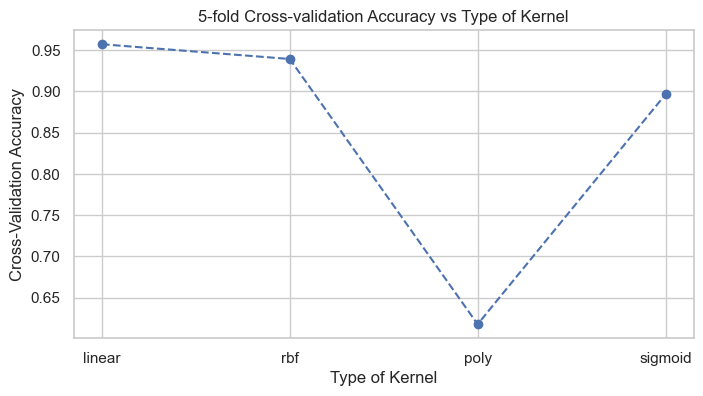

In [12]:
k_values = ['linear', 'rbf', 'poly', 'sigmoid']
cv_scores = []
for k in k_values:
    svc = SVC(kernel = k)
    scores = cross_val_score(svc, X_train, y_train, cv=5, scoring='accuracy')  # 10-fold cross-validation
    cv_scores.append(np.mean(scores))


plt.figure(figsize=(8, 4))
plt.plot(k_values, cv_scores, marker='o', linestyle='--', color='b')
plt.title('5-fold Cross-validation Accuracy vs Type of Kernel')
plt.xlabel('Type of Kernel')
plt.ylabel('Cross-Validation Accuracy')
plt.grid(True)
plt.show()


In [13]:
def run_classifiers(X_train_,y_train_,X_test_, y_test_):
    # KNN
    t1 = time()
    knn = KNeighborsClassifier(n_neighbors=3)
    knn.fit(X_train_, y_train_)
    y_pred_knn = knn.predict(X_test_)
    t2 = time()
    T1 = t2-t1
    accuracy_knn = accuracy_score(y_test_, y_pred_knn)
    
    
    # Mahanalobis Classifier
    t1 = time()
    clf = MahalanobisClassifier()
    clf.fit(X_train_, y_train_) 
    y_pred_mlbs= clf.predict(X_test_)
    t2 = time()
    T2 = t2-t1
    accuracy_mlbs= accuracy_score(y_test_, y_pred_mlbs)
    
    #SVM
    t1 = time()
    svm = SVC(kernel='linear')
    svm.fit(X_train_, y_train_)
    y_pred_svm = svm.predict(X_test_)
    t2 = time()
    T3 = t2-t1
    accuracy_svm = accuracy_score(y_test_, y_pred_svm)
    return accuracy_knn, accuracy_mlbs, accuracy_svm, [T1,T2,T3]
    

In [21]:
results = {'Algorithm': [], 'Accuracy': [], 'Error Rate': [], 'Time Taken(s)': []}
results['Algorithm'].append('K-NN')
results['Accuracy'].append(classifier_acc[0][0])
results['Error Rate'].append(1 - classifier_acc[0][0])
results['Time Taken(s)'].append(time_[0][0])

results['Algorithm'].append('SVM')
results['Accuracy'].append(classifier_acc[0][1])
results['Error Rate'].append(1 - classifier_acc[0][1])
results['Time Taken(s)'].append(time_[0][1])

results['Algorithm'].append('Mahalanobis')
results['Accuracy'].append(classifier_acc[0][2])
results['Error Rate'].append(1 - classifier_acc[0][2])
results['Time Taken(s)'].append(time_[0][2])

     Algorithm  Accuracy  Error Rate  Time Taken(s)
0         K-NN  0.866667    0.133333       0.087654
1          SVM  0.858333    0.141667     241.311779
2  Mahalanobis  0.925000    0.075000       1.695742


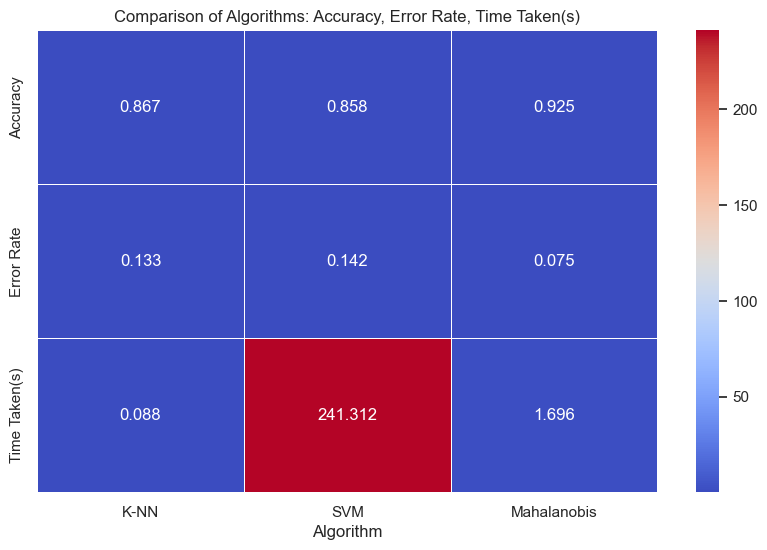

In [22]:
results_df = pd.DataFrame(results)

# Display results table
print(results_df)

# Create a heatmap to compare accuracy, error rate, and time
plt.figure(figsize=(10, 6))
heatmap_data = results_df.set_index('Algorithm').transpose()
sns.heatmap(heatmap_data, annot=True, cmap="coolwarm", linewidths=0.5, fmt=".3f")
plt.title('Comparison of Algorithms: Accuracy, Error Rate, Time Taken(s)')
plt.show()

In [37]:
a,b,c, t = run_classifiers(X_train, y_train, X_test, y_test)
classifier_acc.append([a,b,c])
time_.append(t)
error_rate.append([1-a,1-b,1-c])
print(f'K-NN classifier accuracy (No Dim Reduction): {a * 100:.2f}%')
print(f"Mahanalobis classifier accuracy (No Dim Reduction): {b * 100:.2f}%")
print(f"SVM classifier accuracy (No Dim Reduction): {c * 100:.2f}%")

K-NN classifier accuracy (No Dim Reduction): 90.00%
Mahanalobis classifier accuracy (No Dim Reduction): 90.83%
SVM classifier accuracy (No Dim Reduction): 96.67%


Matrix of PCA variance and KNN accuracies:
                       K=3
PCA 70% variance  0.885714
PCA 75% variance  0.914286
PCA 80% variance  0.921429
PCA 85% variance  0.932143
PCA 90% variance  0.914286
PCA 95% variance  0.903571
PCA 99% variance  0.903571


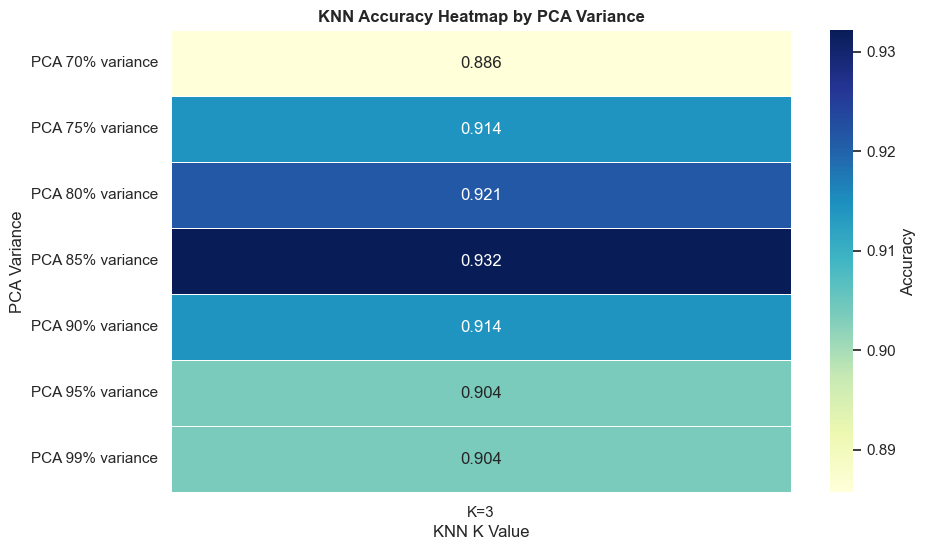

In [47]:
pca_variance_values = [0.70, 0.75, 0.80, 0.85, 0.90, 0.95, 0.99]


knn_k_values = [3]


results_matrix = np.zeros((len(pca_variance_values), len(knn_k_values)))

for i, variance in enumerate(pca_variance_values):
    pca = PCA(n_components=variance)
    X_train_pca = pca.fit_transform(X_train)

    for j, k in enumerate(knn_k_values):
        knn = KNeighborsClassifier(n_neighbors=k)
        scores = cross_val_score(knn, X_train_pca, y_train, cv=5, scoring='accuracy')
        results_matrix[i, j] = np.mean(scores)


results_df = pd.DataFrame(results_matrix, 
                          index=[f'PCA {round(var*100)}% variance' for var in pca_variance_values], 
                          columns=[f'K={k}' for k in knn_k_values])


print("Matrix of PCA variance and KNN accuracies:")
print(results_df)
data = results_df
pca_variance_values = ['PCA 70% variance', 'PCA 75% variance', 'PCA 80% variance', 'PCA 85% variance','PCA 90% variance', 'PCA 95% variance', 'PCA 99% variance']
knn_k_values = [3]

results_df = pd.DataFrame(data, index=pca_variance_values, columns=[f'K={k}' for k in knn_k_values])

plt.figure(figsize=(10, 6))
sns.heatmap(results_df, annot=True, cmap="YlGnBu", fmt=".3f", linewidths=0.5, cbar_kws={'label': 'Accuracy'})
plt.title('KNN Accuracy Heatmap by PCA Variance', fontweight='bold')
plt.ylabel('PCA Variance')
plt.xlabel('KNN K Value')
plt.show()

To get capture a variance of 85.0%, we need minimum of 58 Principal Components


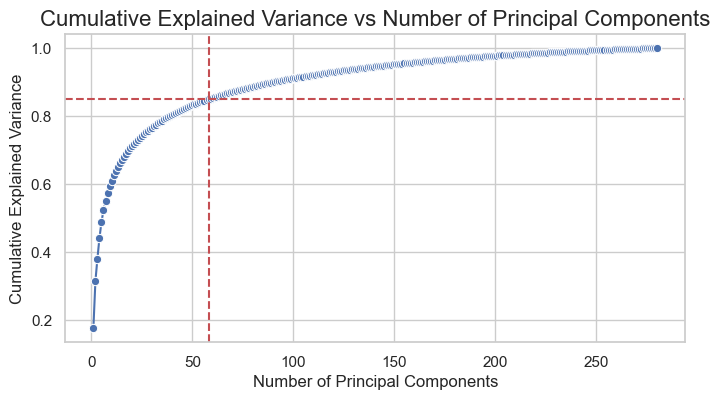

In [39]:
pca = PCA()
X_train_pca = pca.fit(X_train)




cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)
min_var = 0.85
min_pc = np.argmax(cumulative_explained_variance >= min_var) 


print(f'To get capture a variance of {min_var*100}%, we need minimum of {min_pc} Principal Components')
sns.set(style="whitegrid")
plt.figure(figsize=(8, 4))
sns.lineplot(x=range(1, len(cumulative_explained_variance) + 1), y=cumulative_explained_variance, marker="o", color="b")
plt.title('Cumulative Explained Variance vs Number of Principal Components', fontsize=16)
plt.xlabel('Number of Principal Components', fontsize=12)
plt.ylabel('Cumulative Explained Variance', fontsize=12)
plt.axhline(y=min_var, color='r', linestyle='--')  # Threshold line for 95% variance
plt.axvline(x=min_pc, color='r', linestyle='--')  # Number of components for 95% variance
plt.grid(True)
plt.show()

In [40]:
# Dimensionality Reduction 1: PCA
pca = PCA(n_components=0.85)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

a,b,c,t = run_classifiers(X_train_pca, y_train, X_test_pca, y_test)
classifier_acc.append([a,b,c])
time_.append(t)
error_rate.append([1-a,1-b,1-c])
print(f'K-NN classifier accuracy (PCA): {a * 100:.2f}%')
print(f"Mahanalobis classifier accuracy (PCA): {b * 100:.2f}%")
print(f"SVM classifier accuracy (PCA): {c * 100:.2f}%")



K-NN classifier accuracy (PCA): 91.67%
Mahanalobis classifier accuracy (PCA): 93.33%
SVM classifier accuracy (PCA): 96.67%


In [41]:
# # Dimensionality Reduction 2: LDA
lda = LinearDiscriminantAnalysis(n_components=39)  # Max number of components is C-1 (40 classes)
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)

a,b,c,t = run_classifiers(X_train_lda, y_train, X_test_lda, y_test)
classifier_acc.append([a,b,c])
time_.append(t)
error_rate.append([1-a,1-b,1-c])

print(f'K-NN classifier accuracy (LDA): {a * 100:.2f}%')
print(f"Mahanalobis classifier accuracy (LDA): {b * 100:.2f}%")
print(f"SVM classifier accuracy (LDA): {c * 100:.2f}%")

K-NN classifier accuracy (LDA): 96.67%
Mahanalobis classifier accuracy (LDA): 92.50%
SVM classifier accuracy (LDA): 97.50%


In [42]:
# # Dimensionality Reduction 3: PCA + LDA
lda = LDA(n_components=39)
X_train_lda_p = lda.fit_transform(X_train_pca, y_train)
X_test_lda_p = lda.transform(X_test_pca)

a,b,c,t = run_classifiers(X_train_lda_p, y_train, X_test_lda_p, y_test)
classifier_acc.append([a,b,c])

time_.append(t)
error_rate.append([1-a,1-b,1-c])
print(f'K-NN classifier accuracy (PCA + LDA): {a * 100:.2f}%')
print(f"Mahanalobis classifier accuracy (PCA + LDA): {b * 100:.2f}%")
print(f"SVM classifier accuracy (PCA + LDA): {c * 100:.2f}%")

K-NN classifier accuracy (PCA + LDA): 99.17%
Mahanalobis classifier accuracy (PCA + LDA): 93.33%
SVM classifier accuracy (PCA + LDA): 99.17%


In [43]:
classifier_acc

[[0.9, 0.9083333333333333, 0.9666666666666667],
 [0.9166666666666666, 0.9333333333333333, 0.9666666666666667],
 [0.9666666666666667, 0.925, 0.975],
 [0.9916666666666667, 0.9333333333333333, 0.9916666666666667]]

In [45]:
time_

[[0.06663370132446289, 240.53464078903198, 0.799415111541748],
 [0.011391162872314453, 0.03704428672790527, 0.014285564422607422],
 [0.010145902633666992, 0.05390310287475586, 0.02153778076171875],
 [0.009000301361083984, 0.030007600784301758, 0.010249853134155273]]

In [46]:
error_rate

[[0.09999999999999998, 0.09166666666666667, 0.033333333333333326],
 [0.08333333333333337, 0.06666666666666665, 0.033333333333333326],
 [0.033333333333333326, 0.07499999999999996, 0.025000000000000022],
 [0.008333333333333304, 0.06666666666666665, 0.008333333333333304]]

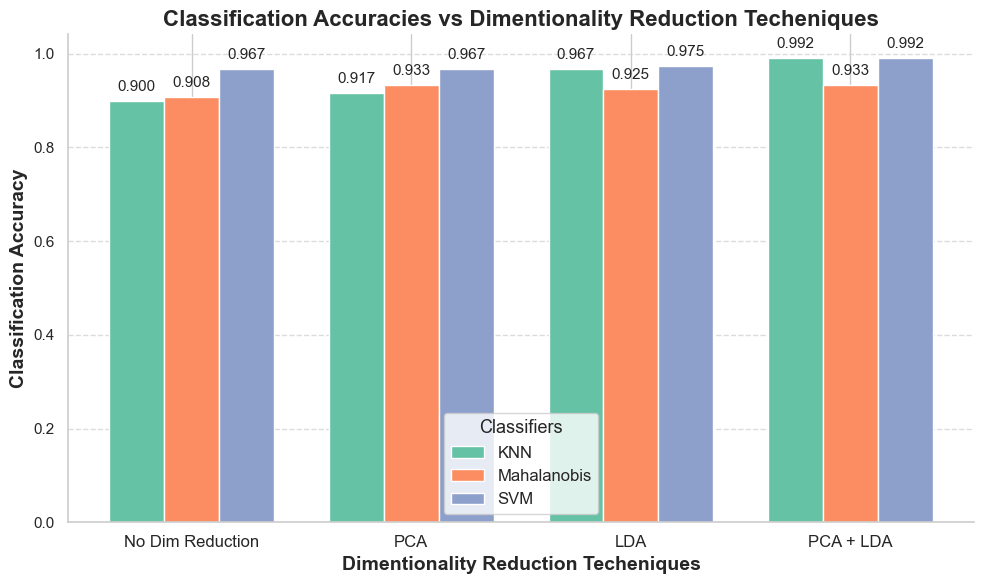

In [48]:


# Set Seaborn style for a more professional look
sns.set(style="whitegrid")

# Classification accuracies: rows represent different trials, columns represent classifiers (KNN, Mahalanobis, SVM)
data = np.array(classifier_acc)

# Classifier and trial labels
classifiers = ['KNN', 'Mahalanobis', 'SVM']
trials = ['No Dim Reduction','PCA', 'LDA', 'PCA + LDA']

# Plot configuration
x = np.arange(len(trials))  # the label locations
width = 0.25  # the width of the bars

# Set the color palette
palette = sns.color_palette("Set2")

# Initialize the plot with Seaborn and Matplotlib
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the bars for each classifier using Seaborn colors
rects1 = ax.bar(x - width, data[:, 0], width, label='KNN', color=palette[0])         # KNN accuracies
rects2 = ax.bar(x, data[:, 1], width, label='Mahalanobis', color=palette[1])         # Mahalanobis accuracies
rects3 = ax.bar(x + width, data[:, 2], width, label='SVM', color=palette[2])         # SVM accuracies

# Add labels, title, and custom x-axis tick labels
ax.set_xlabel('Dimentionality Reduction Techeniques', fontsize=14, fontweight='bold')
ax.set_ylabel('Classification Accuracy', fontsize=14, fontweight='bold')
ax.set_title('Classification Accuracies vs Dimentionality Reduction Techeniques', fontsize=16, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(trials, fontsize=12)
ax.legend(fontsize=12, title="Classifiers", title_fontsize='13')

# Improve plot aesthetics
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(1.2)
ax.spines['bottom'].set_linewidth(1.2)
ax.grid(True, axis='y', linestyle='--', alpha=0.7)

# Display the accuracy values on top of each bar
def autolabel(rects):
    """Attach a text label above each bar displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.3f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 5),  # 5 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=11)

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
plt.tight_layout()
plt.show()
